In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Gathering dataset:

In [3]:
dataset = pd.read_csv( 'iris (1).csv' )
dataset.dropna( inplace = True )

In [4]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data preprocessing and splitting data:

In [5]:
y = dataset[ 'Species' ].values
x = dataset.drop( [ 'Id', 'Species' ], axis = 1 ).values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform( y )

In [6]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0 )

# Training different classification models:

In [7]:
log_regr_model = LogisticRegression()
log_regr_model.fit( x_train, y_train )
print( 'Test accuracy of Logistic Regression is {}%.'.format( log_regr_model.score( x_test, y_test ) * 100 ) )

Test accuracy of Logistic Regression is 100.0%.


C:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


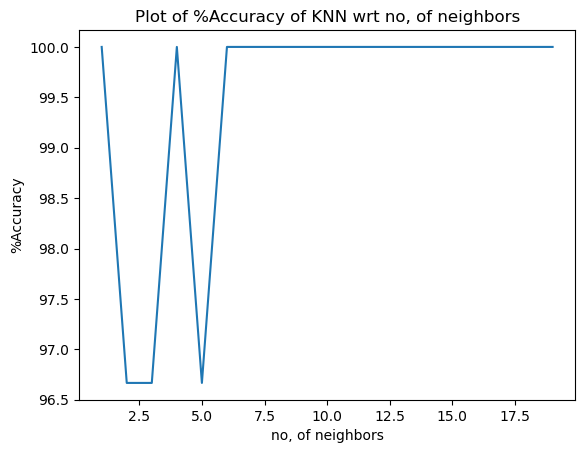

Test accuracy of KNN is 100.0% for no, of neighbors 1.


In [8]:
accuracies = []
for i in range( 1, 20 ):
  knn_model = KNeighborsClassifier( n_neighbors = i )
  knn_model.fit( x_train, y_train )
  accuracies.append( knn_model.score( x_test, y_test ) * 100 )
plt.plot( range( 1, 20 ), accuracies )
plt.title( 'Plot of %Accuracy of KNN wrt no, of neighbors' )
plt.xlabel( 'no, of neighbors' )
plt.ylabel( '%Accuracy' )
plt.show()
print( 'Test accuracy of KNN is {}% for no, of neighbors {}.'.format( max( accuracies ), accuracies.index( max( accuracies ) ) + 1 ) )

In [9]:
svm_model = SVC( random_state = 1 )
svm_model.fit( x_train, y_train )
print( 'Test accuracy of SVM is {}%.'.format( svm_model.score( x_test, y_test ) * 100 ) )

Test accuracy of SVM is 100.0%.


In [10]:
nb_model = GaussianNB()
nb_model.fit( x_train, y_train )
print( 'Test accuracy of nb_model is {}%.'.format( nb_model.score( x_test, y_test ) * 100 ) )

Test accuracy of nb_model is 96.66666666666667%.


In [11]:
dt_model = DecisionTreeClassifier()
dt_model.fit( x_train, y_train )
print( 'Test accuracy of Decision Trees is {}%.'.format( dt_model.score( x_test, y_test ) * 100 ) )

Test accuracy of Decision Trees is 100.0%.


In [12]:
rf_model = RandomForestClassifier( n_estimators = 1000, random_state = 1 )
rf_model.fit( x_train, y_train )
print( 'Test accuracy of Random Forest is {}%.'.format( rf_model.score( x_test, y_test ) * 100 ) )

Test accuracy of Random Forest is 100.0%.


# Comparing different classification models:

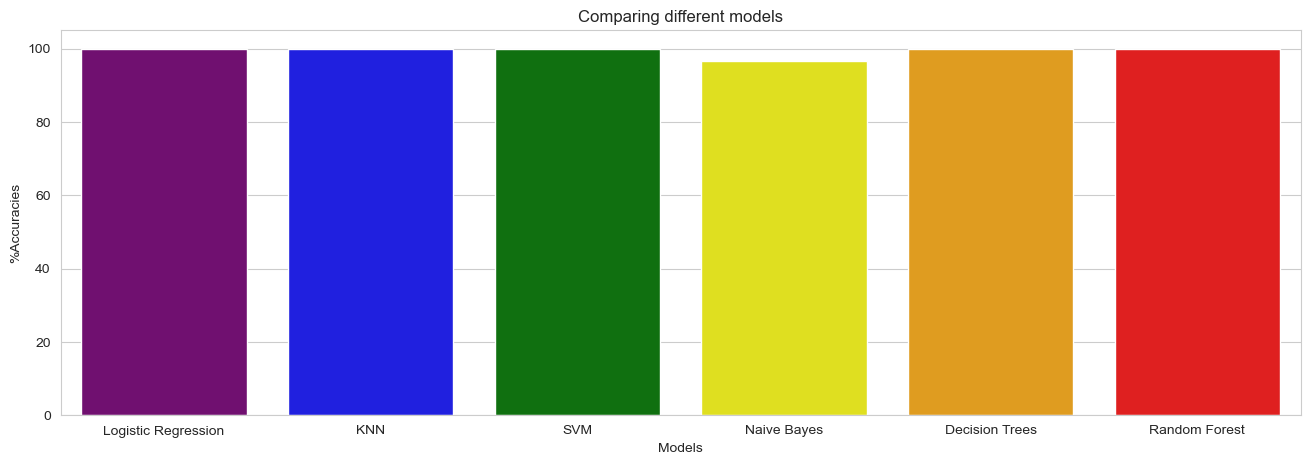

In [13]:
methods = [ 'Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Trees', 'Random Forest' ]
scores = [ log_regr_model.score( x_test, y_test ) * 100, max( accuracies ), svm_model.score( x_test, y_test ) * 100, nb_model.score( x_test, y_test ) * 100, dt_model.score( x_test, y_test ) * 100, rf_model.score( x_test, y_test ) * 100 ]
colors = [ 'purple', 'blue', 'green', 'yellow', 'orange', 'red' ]
sns.set_style( 'whitegrid' )
plt.figure( figsize = ( 16, 5 ) )
sns.barplot( x = methods, y = scores, palette = colors )
plt.title( 'Comparing different models' )
plt.xlabel( 'Models' )
plt.ylabel( '%Accuracies' )
plt.show()

In [14]:
print( 'As seen above, everything has full accuracies except naive bayes.' )
print( 'So, we use Logistic Regression for our predictions.' )

As seen above, everything has full accuracies except naive bayes.
So, we use Logistic Regression for our predictions.


# Making predictions:

In [15]:
print( x_test.shape )

(30, 4)


In [16]:
data_for_pred = [ [ 30.55, 40, 12, 76 ] ]
predictions = log_regr_model.predict( data_for_pred )
classes = [ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ]
predicted_class = classes[ predictions[ 0 ] ]
print( 'The prediction for the data is: {}.'.format( predicted_class ) )

The prediction for the data is: Iris-virginica.
